In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [10]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [11]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [12]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

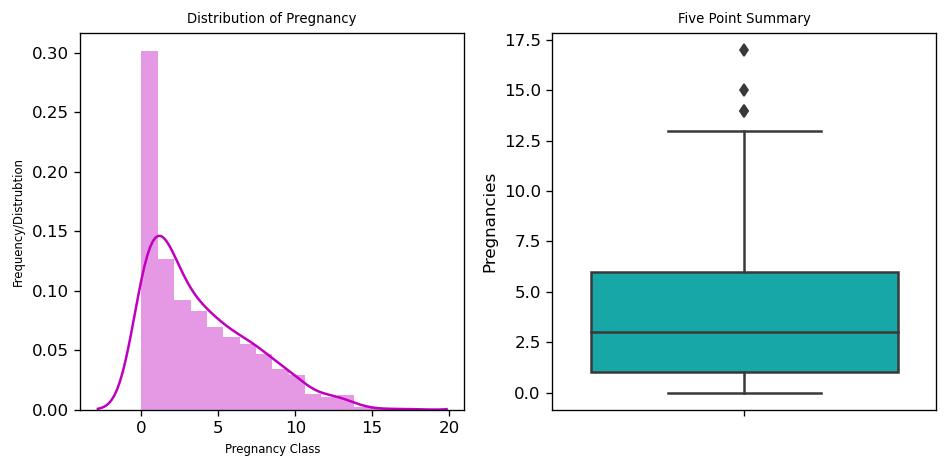

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

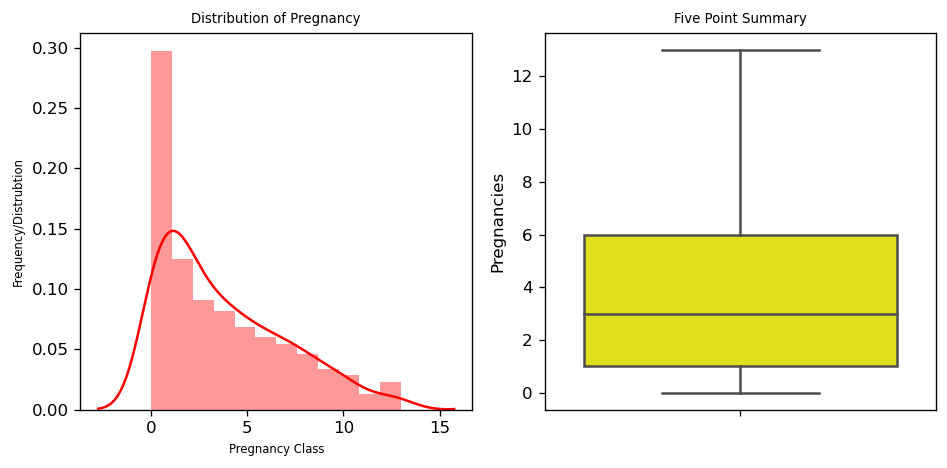

In [14]:
#Treating Outlier and then verifying it

df = std_based('Pregnancies',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='red')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='yellow')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [15]:
df['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

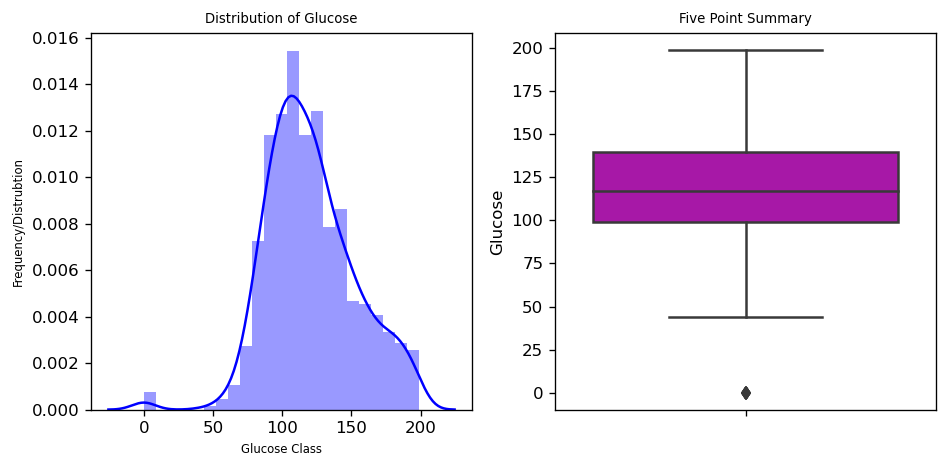

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [17]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


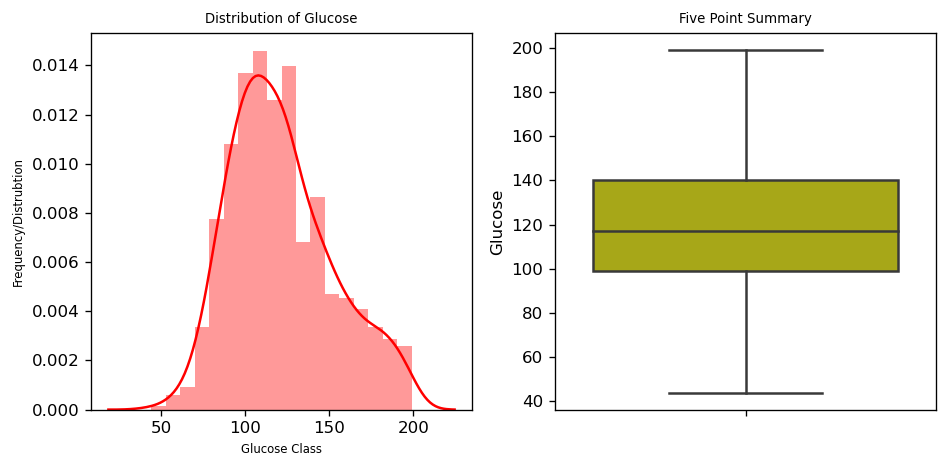

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [19]:
df.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

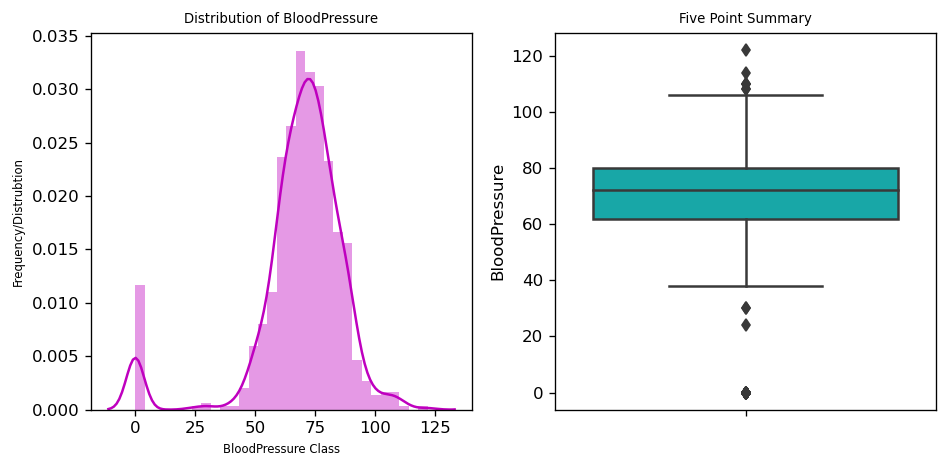

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [21]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [22]:
df  = std_based('BloodPressure',df)

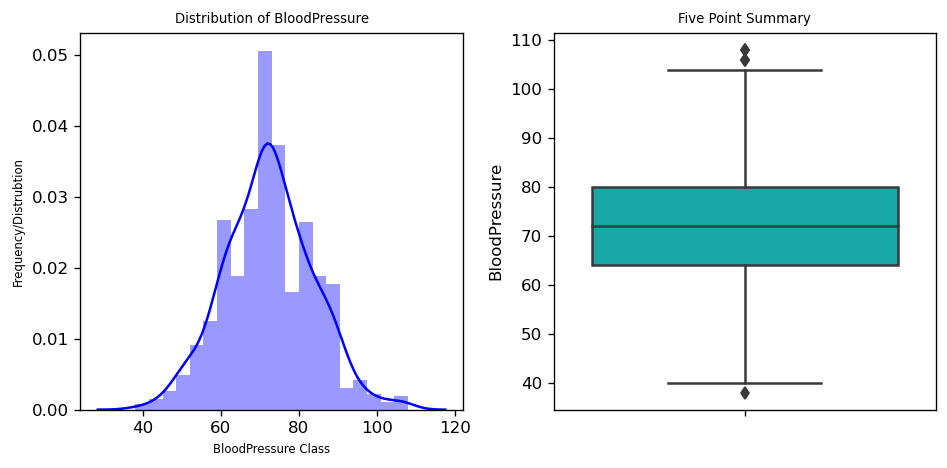

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [24]:
df.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

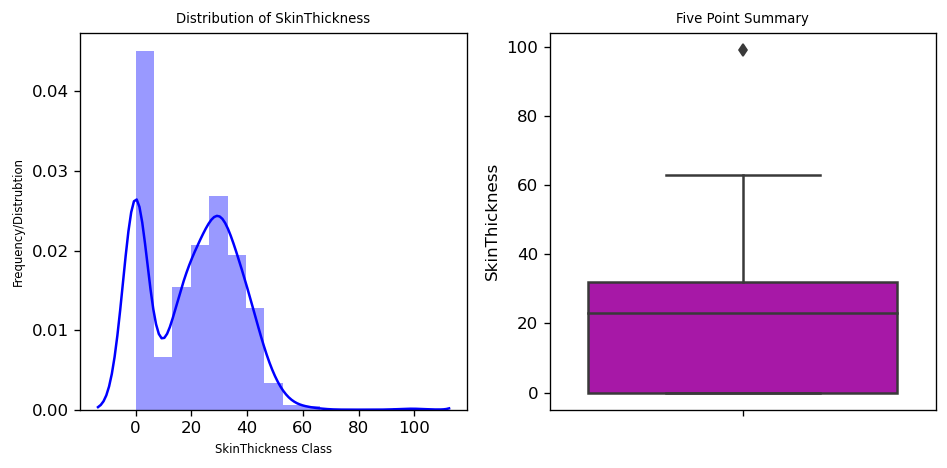

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [26]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.428571,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [27]:
df = std_based("SkinThickness",df)

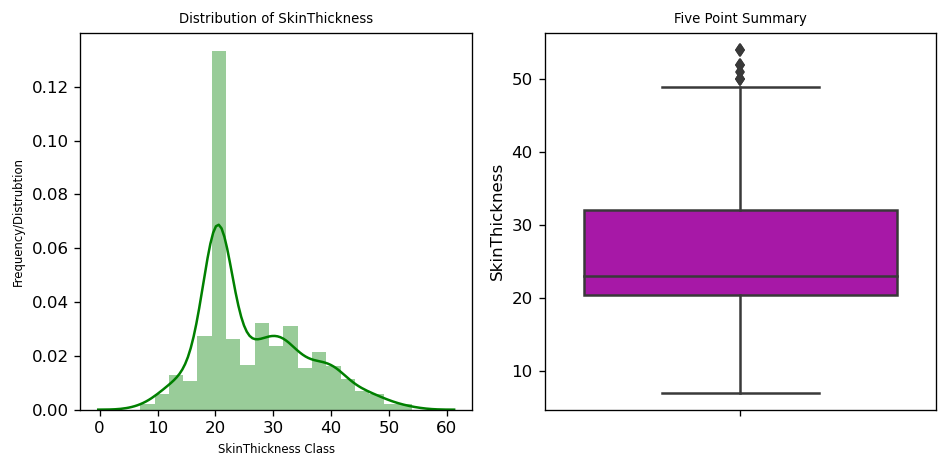

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [29]:
df.Insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

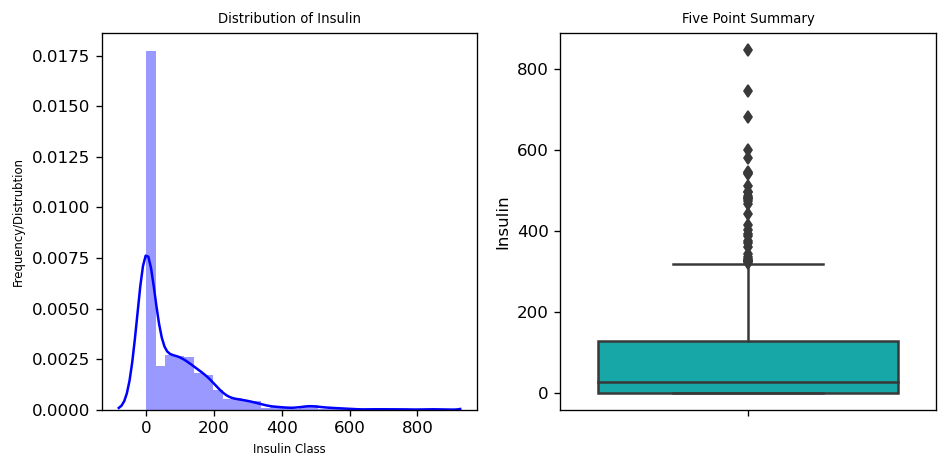

In [30]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [31]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [32]:
df = std_based('Insulin',df)

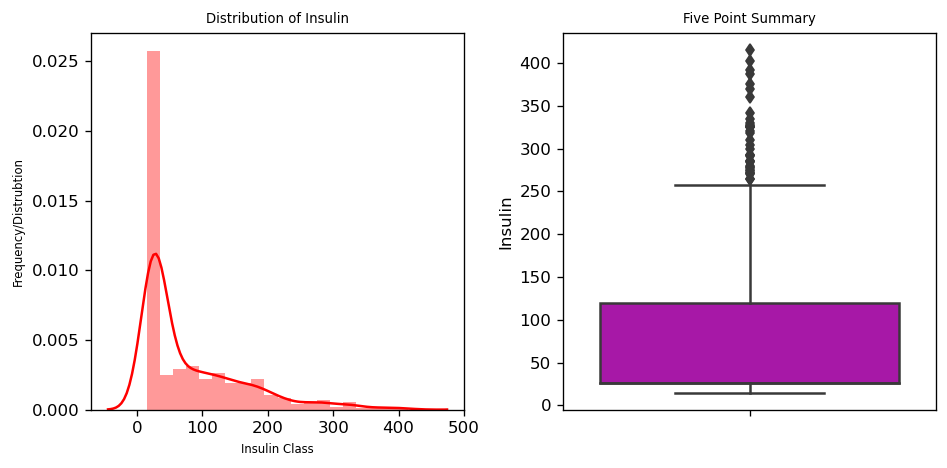

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [34]:
df.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

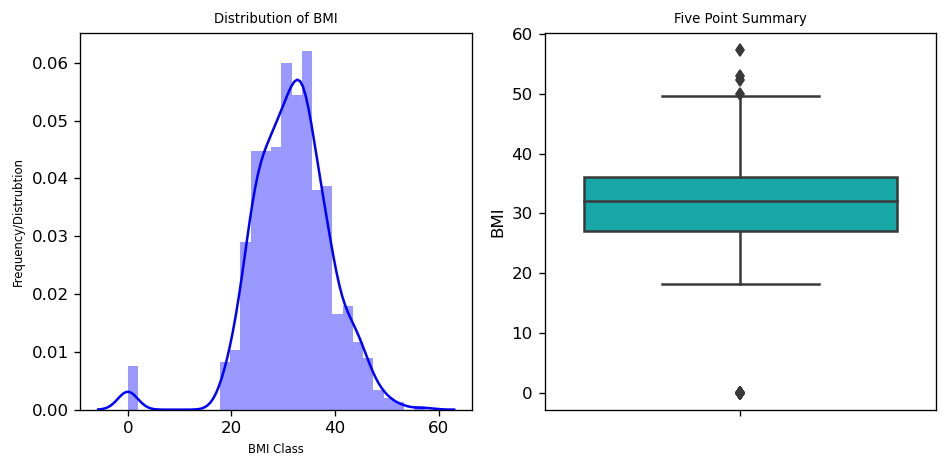

In [35]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [36]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


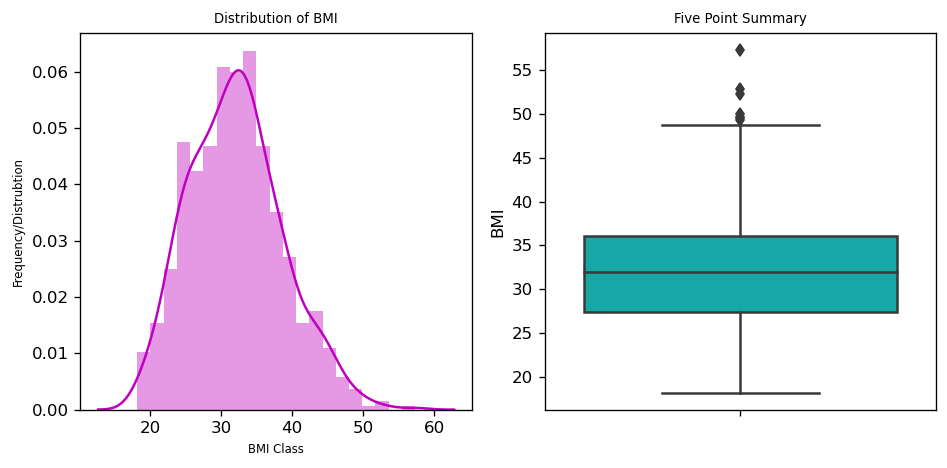

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [38]:
df.DPF.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: DPF, dtype: float64

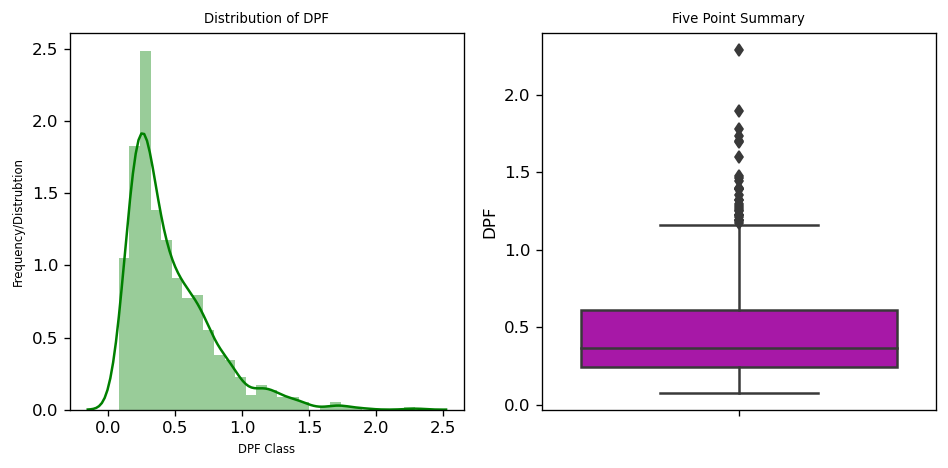

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

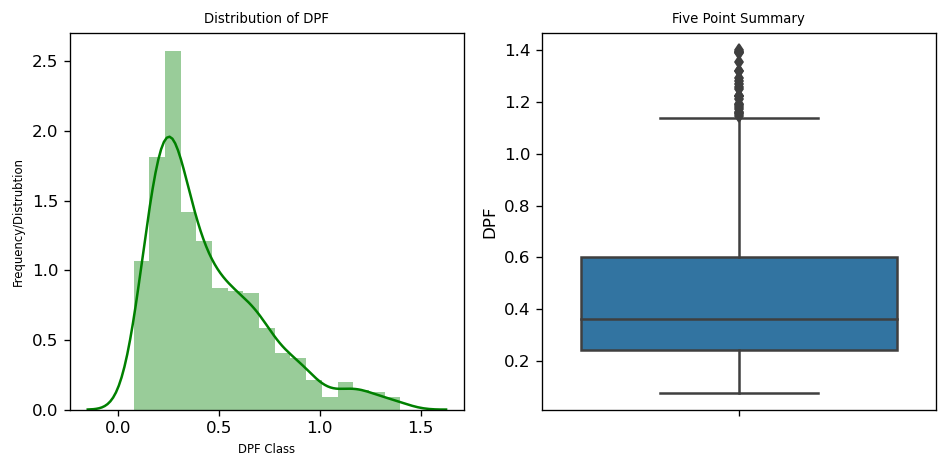

In [40]:
df = std_based('DPF',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [41]:
df.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

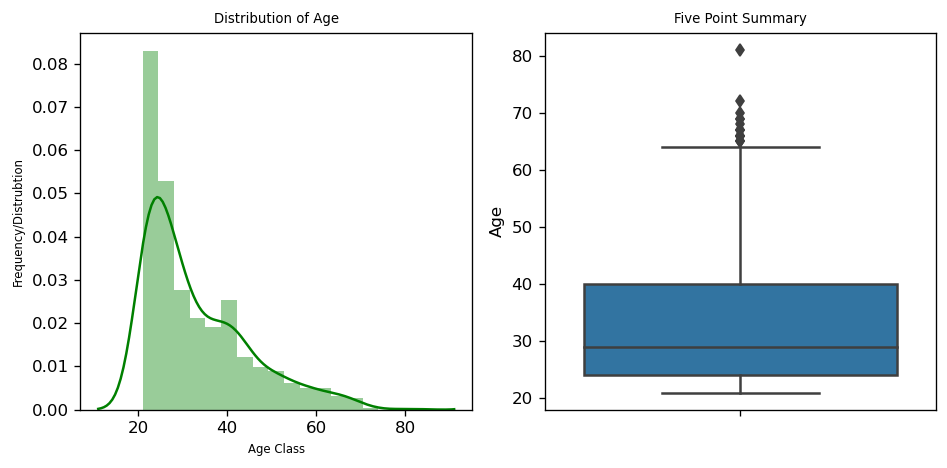

In [42]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

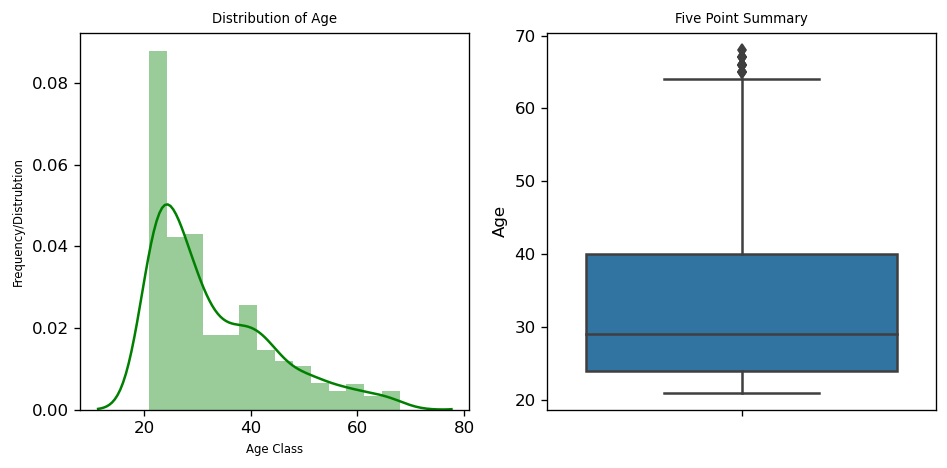

In [43]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
5,5,116.0,74,20.428571,26,25.6,0.201,30,0


In [45]:
df.shape

(719, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    719 non-null    int64  
 1   Glucose        719 non-null    float64
 2   BloodPressure  719 non-null    int64  
 3   SkinThickness  719 non-null    float64
 4   Insulin        719 non-null    int64  
 5   BMI            719 non-null    float64
 6   DPF            719 non-null    float64
 7   Age            719 non-null    int64  
 8   Outcome        719 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.2 KB


In [47]:
df.var()

Pregnancies        10.704623
Glucose           872.795253
BloodPressure     128.731754
SkinThickness      80.891303
Insulin          6387.167685
BMI                42.768611
DPF                 0.077433
Age               127.254326
Outcome             0.223604
dtype: float64

In [48]:
df.drop('DPF',axis = 1,inplace=True)

In [49]:
#Splitting Data

In [50]:
df.Outcome.value_counts()

0    477
1    242
Name: Outcome, dtype: int64

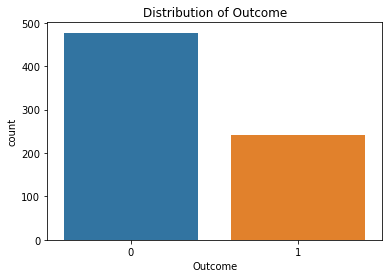

In [51]:
sns.countplot(df['Outcome']).set_title('Distribution of Outcome')
plt.show()

In [53]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(575, 7)
(144, 7)
(575,)
(144,)


In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log = LogisticRegression()

In [57]:
log.fit(X_train, y_train)

LogisticRegression()

In [58]:
log.score(X_test, y_test)

0.7708333333333334

In [59]:
pred = log.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test, pred)

0.7708333333333334